# 5주차 과제

Made by 35기 코딩부장 류제현

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## 연습문제 1) Real Datasets Machine Learning

Mnist 데이터셋을 가지고 숫자 손글씨를 인식하는 분류기를 만들어 봅시다

해당 데이터셋은 0~9 사이의 숫자의 손글씨 이미지를 가지고 있습니다

In [2]:
# 우선 데이터를 불러오겠습니다
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

# X,y를 분리해 줍니다
X = mnist["data"].values
y = mnist["target"].astype(np.uint8)

In [3]:
# 데이터는 이렇게 생겼습니다
print(X.shape) # (28*28)크기의 이미지 입니다
print(y.shape)

(70000, 784)
(70000,)


정답:  0


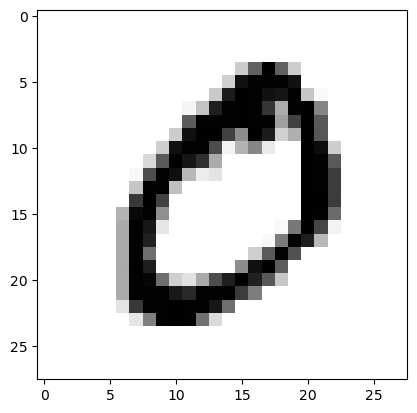

In [4]:
# 데이터 한 개를 확인해 보겠습니다

# X[0]은 0번째 데이터 입니다. n을 바꿔가면서 데이터가 어떻게 생겼는지 한번 확인해보세요
n = 1

# 넘파이 array로 된 데이터를 그려줍니다 (imshow 함수는 이미지를 그려줍니다)
plt.imshow(X[n].reshape(28,28), cmap="binary")

print("정답: ", y[n])

    문제1) Train_test_split을 사용해 X,y를 Train_set과 Test_set으로 나눠주세요!

* 주의! 결과를 동일하게 맞추기 위해서 train_test_split(random_state=10)으로 지정해 주세요!

In [5]:
# 문제 1 코드
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10)

    문제2) Standard Scaler를 사용해서 데이터를 표준화 해봅시다

* 주의1) Test 데이터는 fit 시키지 말고, Train 데이터에서 fit 시킨 것을 가지고 transform만 해줘야 합니다!

* 주의2) 정답지(y)는 수정하면 안되겠죠? 그대로 남겨 둬야 합니다 

In [6]:
# 문제 2 코드
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

    문제3) RandomForestClassifier의 기본(Default) 파라미터 값으로 모델을 훈련시켜 봅시다 

In [7]:
# 문제 3 코드
# SVC는 Support Vector Classifier를 의미합니다
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

    문제4) 위에서 학습시킨 분류기의 정확도(Accuracy), 정밀도(Precision score), 재현율(Recall Score)를 구해봅시다  

* 주의 1) Train 데이터에 대한 점수, Test 데이터에 대한 점수를 모두 구해봅시다!

* 주의 2) precision_score와 recall_score를 구할때 average="macro"로 지정해줘야 합니다! 이에 대한 설명은 수업시간에 하도록 하겠습니다

* 주의 3) StandardScaler를 사용해 표준화한 Train 데이터를 사용했기 때문에, 점수를 구할 때도 표준화 시킨 Train 데이터를 사용해야 합니다

In [8]:
# 문제 4-1) Train_data에 대한 점수
from sklearn.metrics import precision_score, recall_score

print("정확도: ", model.score(X_train_scaled, 
                             y_train))

print("정밀도: ", precision_score(y_train, 
                                 model.predict(X_train_scaled), 
                                 average="macro"))

print("재현율: ", recall_score(y_train,
                              model.predict(X_train_scaled),
                              average="macro"))

정확도:  1.0
정밀도:  1.0
재현율:  1.0


In [9]:
# 문제 4-2) Test-Data에 대한 점수

print("정확도: ", model.score(X_test_scaled, 
                             y_test))

print("정밀도: ", precision_score(y_test, 
                                 model.predict(X_test_scaled), 
                                 average="macro"))

print("재현율: ", recall_score(y_test,
                              model.predict(X_test_scaled),
                              average="macro"))

정확도:  0.9670857142857143
정밀도:  0.9669096599046029
재현율:  0.9669491605018864


    문제 5) Grid-Search를 사용해서 RandomForest 모델의 최적의 파라미터를 찾아 봅시다

* 주의) GridSearchCV의 파라미터를 cv=4, n_jobs=-1로 지정해주세요

* Train 데이터는 위에서와 똑같은 Scaled된 데이터를 사용해주세요

* Grid-Search는 그리드의 크기에 비례해서 계산량이 증가합니다. 

* 따라서, 학습 속도를 위해서는 데이터의 일부만 가지고 Grid-Search를 하는 것이 현명합니다! 데이터 10000개만 가지고 Grid-search를 해봅시다

* 코드 실행에 1분 이상 걸릴 수 있습니다

In [10]:
# 문제 5-1) 10000개의 데이터만 가지고 GridSearch를 수행하고, 최적의 파라미터를 찾아봅시다
## 데이터 10000개 예시 코드 -> X_train[:10000]
from sklearn.model_selection import GridSearchCV

grid_params = {"n_estimators": [100, 500, 1000],
               "max_depth": [10,30,50,70]}

forest = RandomForestClassifier()

grid_clf = GridSearchCV(forest, param_grid=grid_params,
                        cv=4, n_jobs=-1)

grid_clf.fit(X_train_scaled[:10000], y_train[:10000])
grid_clf.best_params_

{'max_depth': 70, 'n_estimators': 1000}

In [11]:
# 문제 5-2) 앞에서 찾은 최적의 파라미터로, Train 데이터를 전부 사용해 모델을 훈련시켜봅시다
forest_best = RandomForestClassifier(n_estimators=1000, 
                                     max_depth=30,
                                     n_jobs=-1) # n_jobs: 속도 향상을 위해

forest_best.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=30, n_estimators=1000, n_jobs=-1)

    문제6) 위에서 학습시킨 분류기의 정확도(Accuracy), 정밀도(Precision score), 재현율(Recall Score)를 구해봅시다  

* 주의 1) Test 데이터에 대한 점수만 구해봅시다!

* 주의 2) precision_score함수와 recall_score 함수에 average="macro"로 지정해줘야 합니다!

* 주의 3) StandardScaler를 사용해 표준화한 Train 데이터를 사용했기 때문에, 점수를 구할 때도 표준화한 Test 데이터를 사용해야 합니다

In [12]:
# 문제 6 코드) Test 데이터에 대한 모델의 정확도, 정밀도, 재현율을 구해봅시다
print("정확도: ", forest_best.score(X_test_scaled, 
                             y_test))

print("정밀도: ", precision_score(y_test, 
                                 forest_best.predict(X_test_scaled), 
                                 average="macro"))

print("재현율: ", recall_score(y_test,
                              forest_best.predict(X_test_scaled),
                              average="macro"))

정확도:  0.9694857142857143
정밀도:  0.9693326646589242
재현율:  0.9693863774701622


## 연습문제 2) Equal Weight Strategy + CAPM Alpha Regression

우리의 전략에 알파($\alpha$)가 존재하는지 찾아봅시다!!

---

    1. Daily Rebalancing Equal weight 전략을 구현합시다 (힌트: 각 주식의 평균 수익이 equal weight 전략의 수익입니다)

    2. 시장 인덱스(kospi)를 전략의 수익(returns)에 회귀(Regression)해 주세요 (회귀는 1주차 수업 참조)
    
회귀식) $Return_{strategy} = \beta*  Return_{Market} + \alpha$

In [19]:
# 데이터를 불러옵니다
market = pd.read_csv("kospi.csv", index_col=0, parse_dates=True)
stock = pd.read_csv("Stock.csv", index_col=0, parse_dates=True)

In [20]:
# 각 주식과 마켓(코스피)의 리턴을 계산합니다
stock_rtn = stock.pct_change().fillna(0)
market_rtn = market.pct_change().fillna(0)

In [21]:
# equal weight 전략은 각 주식의 수익률의 mean과 동일합니다
strategy_rtn = stock_rtn.mean(1)
strategy_rtn

Date
2018-01-02    0.000000
2018-01-03   -0.016227
2018-01-04   -0.020044
2018-01-05    0.006800
2018-01-08   -0.006264
                ...   
2022-12-23   -0.016517
2022-12-26    0.005619
2022-12-27    0.000717
2022-12-28   -0.031836
2022-12-29   -0.013993
Length: 1232, dtype: float64

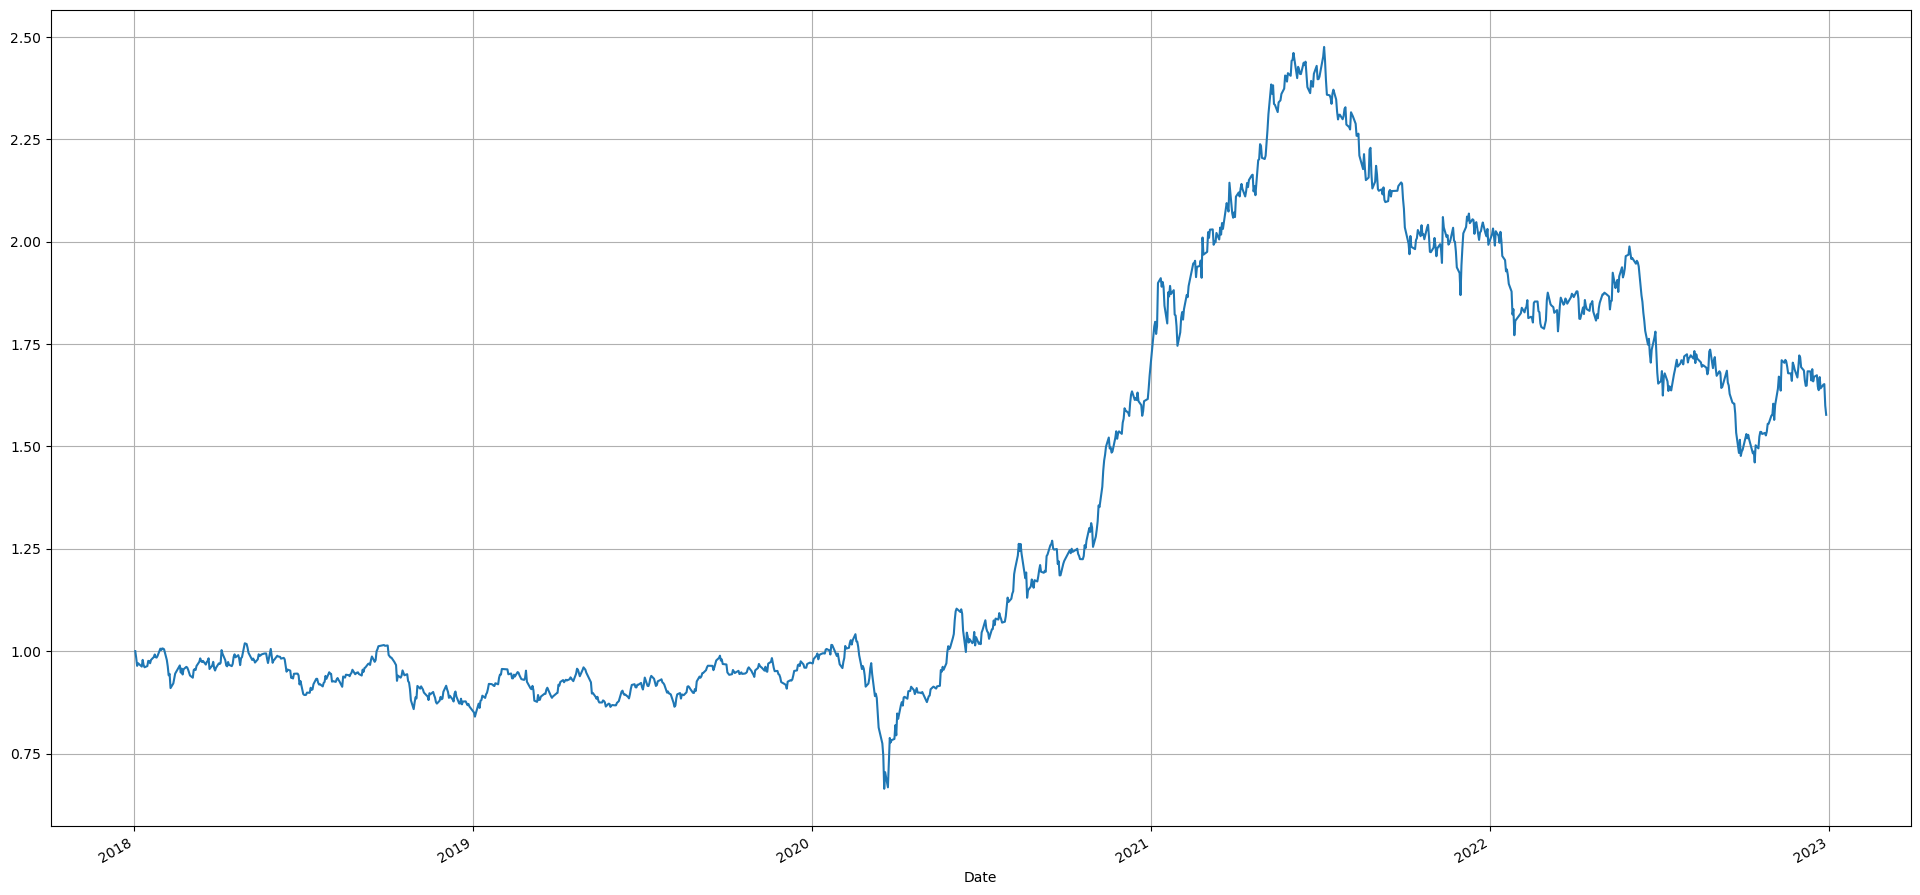

In [22]:
# 수익을 plot해 봅시다
(strategy_rtn + 1).cumprod().plot(figsize=(24,12))
plt.grid();

c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


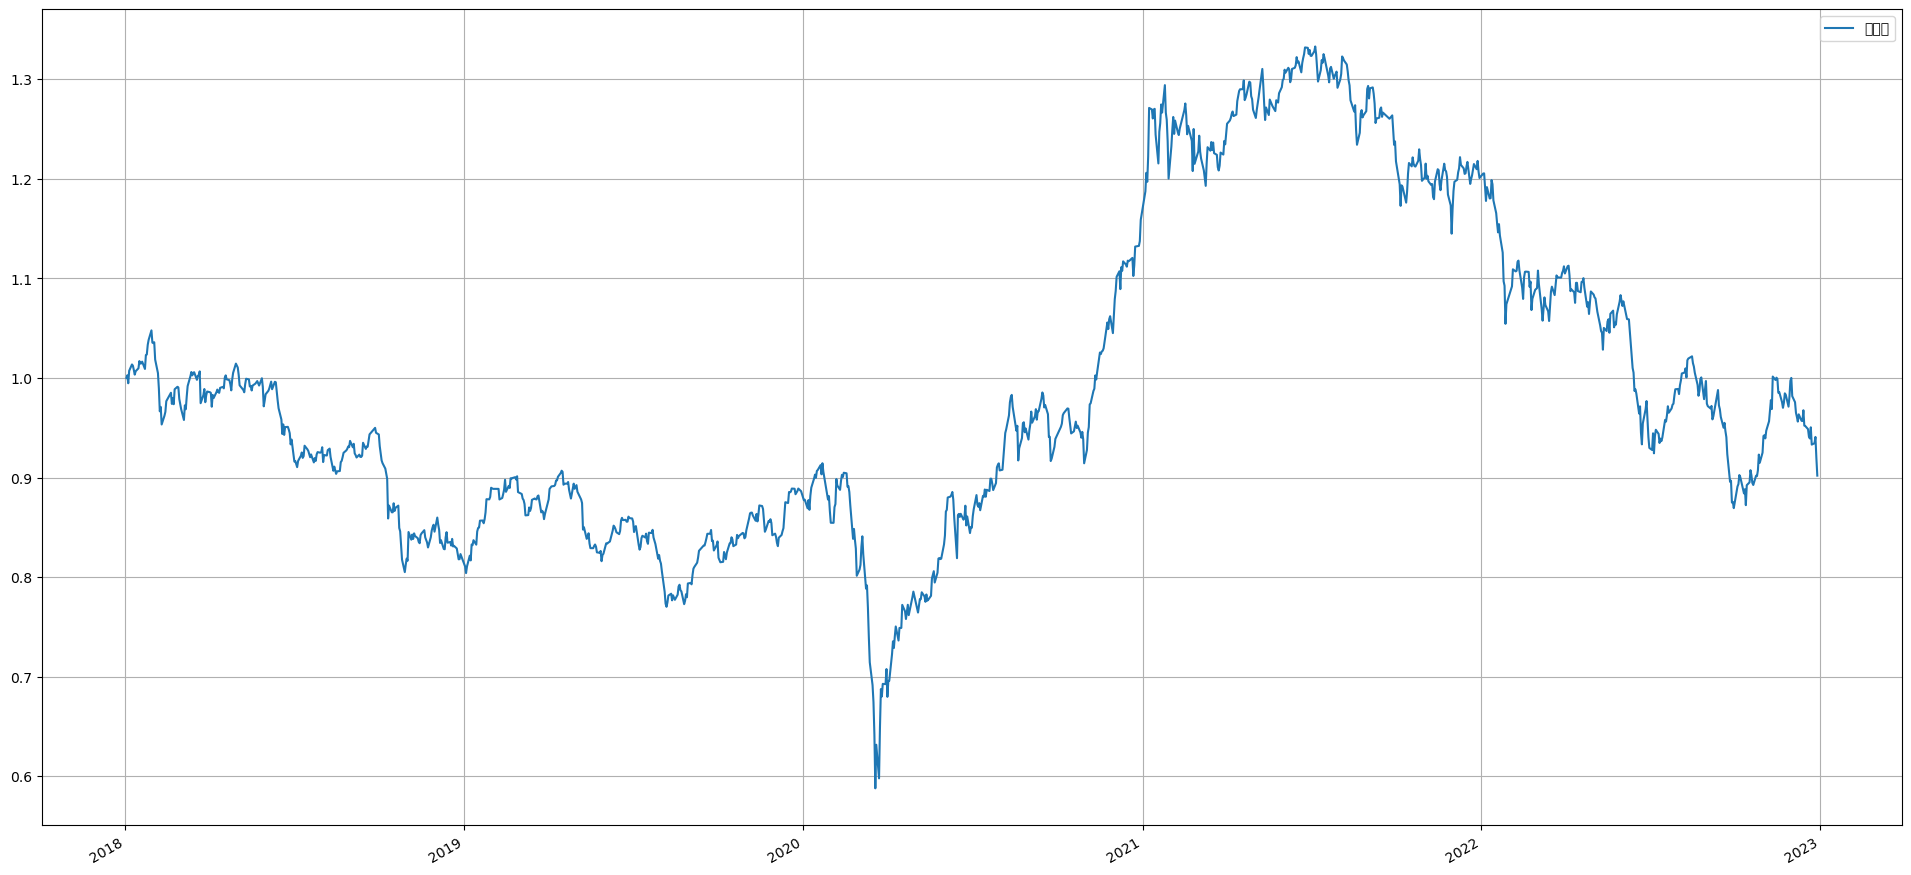

In [23]:
# 동기간 market(코스피)의 수익(시작점의 자산이 1)
(market_rtn+1).cumprod().plot(figsize=(24,12))
plt.grid();

In [24]:
# Regression을 해줍시다
import statsmodels.api as sm 

model = sm.OLS(strategy_rtn, sm.add_constant(market_rtn))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2380.
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          7.10e-290
Time:                        23:11:38   Log-Likelihood:                 4097.0
No. Observations:                1232   AIC:                            -8190.
Df Residuals:                    1230   BIC:                            -8180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.992      0.047     7.4e-06       0.001
코스피            1.0174      0.021     48.788      0.000       0.977       1.058
==============================================================================
Omnibus:                      157.193   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              576.304
Skew:                           0.583   Prob(JB):                    7.20e-126
Kurtosis:                       6.142   Cond. No.                         84.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

고생하셨습니다!! 